In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ifsp_df = pd.read_csv('../data/TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx - Compiled_IFSP Teaming.csv')
child_df = pd.read_csv('../data/TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx - All Children with IFSPs.csv')

In [4]:
ifsp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CHILD_ID              9543 non-null   int64 
 1   SERVICE_DATE          9543 non-null   object
 2   START_TIME            9532 non-null   object
 3   END_TIME              9532 non-null   object
 4   SERVICE_SETTING       9533 non-null   object
 5   SERVICE DELIVERY      9543 non-null   object
 6   ADD_USER              9543 non-null   object
 7   ADD_DATE              9543 non-null   object
 8   IFSP Teaming ID name  9543 non-null   object
 9   Agency Name           9543 non-null   object
 10  Agency Type           9543 non-null   object
 11  Service Name          9543 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.8+ KB


In [5]:
child_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138664 entries, 0 to 138663
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   POE            138664 non-null  object
 1   Child ID       138664 non-null  int64 
 2   Referral Date  138664 non-null  object
 3   Exit Date      15607 non-null   object
dtypes: int64(1), object(3)
memory usage: 4.2+ MB


In [6]:
ifsp_df.head()

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
0,457136,1/21/2022,9:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,1/21/22 17:54,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
1,457136,2/15/2022,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2/16/22 5:29,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
2,457585,1/24/2022,8:30:00,9:30:00,Telehealth,Service Delivered,MILLARDCATHERINE,1/24/22 14:18,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
3,457852,1/12/2022,14:00:00,15:00:00,Community-based,Service Delivered,HEMELKATIE1,1/18/22 10:39,IEP Meeting,LTVEC,EIRA,Dev. Therapy Prof - Home/Community
4,458051,1/12/2022,12:00:00,13:00:00,Telehealth,Service Delivered,JONESMEGAN,1/12/22 13:46,IFSP Meeting,"First Steps, Inc (EIRA)",EIRA,Dev. Therapy Prof - Home/Community


In [7]:
child_df.head()

,POE,Child ID,Referral Date,Exit Date
0,ET,508615,8/6/2021,NaN
1,ET,488455,11/2/2021,NaN
2,ET,494500,12/14/2020,NaN
3,ET,515143,11/22/2021,NaN
4,ET,505490,6/15/2021,NaN


In [9]:
patients = ifsp_df['CHILD_ID'].value_counts()
patients


494031    48
480109    34
501065    32
481017    31
494794    31
          ..
505287     1
505291     1
505293     1
505307     1
542122     1
Name: CHILD_ID, Length: 4789, dtype: int64

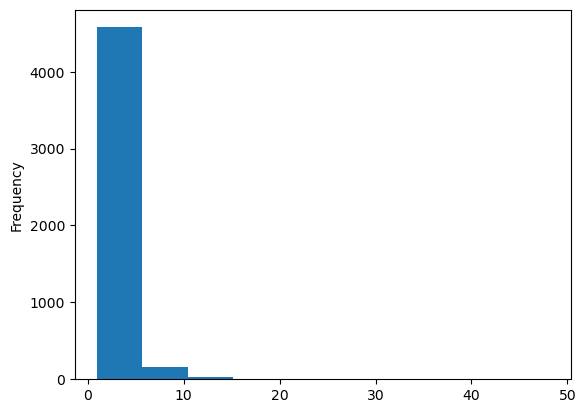

In [11]:
patients.plot(kind = 'hist')
plt.show()

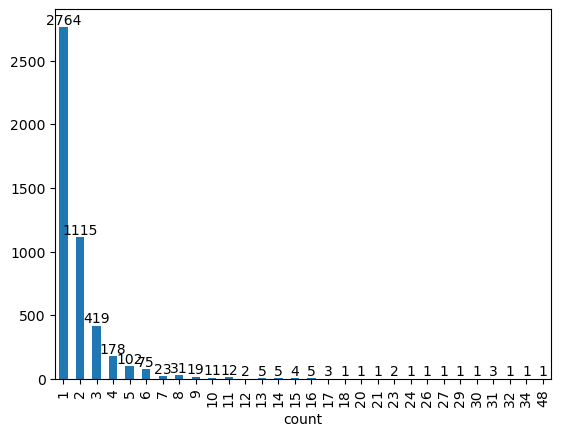

In [13]:
patients_df = pd.DataFrame({'CHILD_ID': patients.index,
                            'count': patients.values})
ax = patients_df.groupby('count').size().plot(kind='bar')

for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

How many children are receiving co-visits? What is the rate of co-visits? That is, out of children how have an IFSP, how many are receiving co-visits?

In [17]:
print(ifsp_df.columns)

Index(['CHILD_ID', 'SERVICE_DATE', 'START_TIME', 'END_TIME', 'SERVICE_SETTING',
       'SERVICE DELIVERY', 'ADD_USER', 'ADD_DATE', 'IFSP Teaming ID name',
       'Agency Name', 'Agency Type', 'Service Name'],
      dtype='object')


In [20]:
cvisits = ifsp_df.loc[ifsp_df['IFSP Teaming ID name'].str.contains('Co-Visit')]
cvisits

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
1,457136,2/15/2022,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2/16/22 5:29,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
6,458850,2/15/2022,14:00:00,14:30:00,Telehealth,Service Delivered,BUCKCYNTHIA,2/15/22 18:07,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
7,458851,2/15/2022,14:15:00,14:45:00,Telehealth,Service Delivered,BUCKCYNTHIA,2/15/22 18:08,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
8,459167,1/26/2022,9:30:00,10:00:00,Telehealth,Service Delivered,HINESKONSTANCE,1/26/22 11:08,Co-Visit,LeBonheur EI & Dev (LEAD) (EIRA),EIRA,Physical Therapy Assistant
9,459167,1/26/2022,9:00:00,10:00:00,Telehealth,Service Delivered,GLASSKATHERINE,2/2/22 11:57,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Speech Therapy
...,...,...,...,...,...,...,...,...,...,...,...,...
9537,540954,1/27/2023,10:35:00,11:33:00,Other,Service Delivered,SPRADLINGSARAH,1/27/23 15:21,Co-Visit,Rainbow Early Intervention (HATS),EIRA,Dev. Therapy Prof - Home/Community
9538,541337,1/10/2023,15:00:00,16:00:00,Home,Service Delivered,WESTAMY,1/12/23 17:55,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community
9539,541511,1/19/2023,13:30:00,14:30:00,Home,Service Delivered,WESTAMY,1/20/23 16:11,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community
9540,541890,1/19/2023,9:00:00,10:00:00,Home,Service Delivered,WESTAMY,1/20/23 10:23,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community


In [37]:
cvbychild = cvisits.groupby('CHILD_ID').count().sort_values(by = 'SERVICE_DATE', ascending=False)
cvbychild

,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
CHILD_ID,,,,,,,,,,,
494031,48,48,48,48,48,48,48,48,48,48,48
480109,33,33,33,33,33,33,33,33,33,33,33
481017,31,31,31,31,31,31,31,31,31,31,31
494794,31,31,31,31,31,31,31,31,31,31,31
513816,30,30,30,30,30,30,30,30,30,30,30
...,...,...,...,...,...,...,...,...,...,...,...
507100,1,1,1,1,1,1,1,1,1,1,1
507139,1,1,1,1,1,1,1,1,1,1,1
507197,1,1,1,1,1,1,1,1,1,1,1


In [47]:
cvisits_df = ifsp_df[ifsp_df['IFSP Teaming ID name'] == 'Co-Visit']
cvisits_df.info()
cvisits_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4091 entries, 1 to 9542
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CHILD_ID              4091 non-null   int64 
 1   SERVICE_DATE          4091 non-null   object
 2   START_TIME            4087 non-null   object
 3   END_TIME              4087 non-null   object
 4   SERVICE_SETTING       4088 non-null   object
 5   SERVICE DELIVERY      4091 non-null   object
 6   ADD_USER              4091 non-null   object
 7   ADD_DATE              4091 non-null   object
 8   IFSP Teaming ID name  4091 non-null   object
 9   Agency Name           4091 non-null   object
 10  Agency Type           4091 non-null   object
 11  Service Name          4091 non-null   object
dtypes: int64(1), object(11)
memory usage: 415.5+ KB


,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
1,457136,2/15/2022,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2/16/22 5:29,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
6,458850,2/15/2022,14:00:00,14:30:00,Telehealth,Service Delivered,BUCKCYNTHIA,2/15/22 18:07,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
7,458851,2/15/2022,14:15:00,14:45:00,Telehealth,Service Delivered,BUCKCYNTHIA,2/15/22 18:08,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
8,459167,1/26/2022,9:30:00,10:00:00,Telehealth,Service Delivered,HINESKONSTANCE,1/26/22 11:08,Co-Visit,LeBonheur EI & Dev (LEAD) (EIRA),EIRA,Physical Therapy Assistant
9,459167,1/26/2022,9:00:00,10:00:00,Telehealth,Service Delivered,GLASSKATHERINE,2/2/22 11:57,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Speech Therapy


In [53]:
cddf = cvisits_df.groupby('CHILD_ID').size()
cd_df = cddf.sort_values(ascending=False)
cd_df

CHILD_ID
494031    48
480109    33
481017    31
494794    31
513816    30
          ..
507100     1
507139     1
507197     1
507257     1
542122     1
Length: 1645, dtype: int64

In [60]:
agency_co = cvisits_df.groupby('Agency Name').size().sort_values(ascending=False)
agency_co

Agency Name
LeBonheur EI & Dev (LEAD) (vendor)              902
LeBonheur EI & Dev (LEAD) (EIRA)                340
Shelby Residential & Voc Svcs(SRVS) (EIRA)      232
Therapy & Learning Center, Inc. (EIRA)          216
Kid's Putnam, Inc.                              212
                                               ... 
LIFT Therapy dba Sports Plus Dyersburg            1
LIFT Therapy dba Sports Plus Lexington            1
Stellar Therapy Services                          1
Methodist Medical Center                          1
Words for Life Speech & Language Center, LLC      1
Length: 76, dtype: int64

In [66]:
child_provider = cvisits_df.groupby(['CHILD_ID', 'Agency Name']).size()
child_provider

CHILD_ID  Agency Name                         
457136    Siskin Children's Institute (EIRA)      1
458850    Physical Therapy Services, PA (EIRA)    1
458851    Physical Therapy Services, PA (EIRA)    1
459167    LeBonheur EI & Dev (LEAD) (EIRA)        1
          LeBonheur EI & Dev (LEAD) (vendor)      4
                                                 ..
540954    Rainbow Early Intervention (HATS)       1
541337    Kid's Putnam, Inc.                      1
541511    Kid's Putnam, Inc.                      1
541890    Kid's Putnam, Inc.                      1
542122    Little Folks Arc of Washington Co.      1
Length: 1888, dtype: int64

In [67]:
child_provider = child_provider.reset_index(name='count')
child_provider = child_provider.pivot(index = 'CHILD_ID', columns = 'Agency Name', values = 'count')
print(child_provider)

Agency Name  BEST (Blind-Visually Impaired Early Svcs Tn)  \
CHILD_ID                                                    
457136                                                NaN   
458850                                                NaN   
458851                                                NaN   
459167                                                NaN   
459566                                                NaN   
...                                                   ...   
540954                                                NaN   
541337                                                NaN   
541511                                                NaN   
541890                                                NaN   
542122                                                NaN   

Agency Name  BRIDGES - Tennessee Tech University  Beth A. Ballinger  \
CHILD_ID                                                              
457136                                       NaN                

In [79]:
child_date = cvisits_df.groupby(['CHILD_ID', 'SERVICE_DATE']).count().sort_values(by = 'START_TIME', ascending=False)
child_date

,,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
CHILD_ID,SERVICE_DATE,,,,,,,,,,
513816,10/12/2022,3,3,3,3,3,3,3,3,3,3
514773,9/15/2022,3,3,3,3,3,3,3,3,3,3
513816,1/11/2023,3,3,3,3,3,3,3,3,3,3
494031,1/24/2023,3,3,3,3,3,3,3,3,3,3
513816,11/9/2022,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
499888,5/12/2022,1,1,1,1,1,1,1,1,1,1
521207,7/20/2022,0,0,0,1,1,1,1,1,1,1
511559,7/4/2022,0,0,1,1,1,1,1,1,1,1


In [80]:
cdate_count = child_date.groupby('CHILD_ID').size().sort_values(ascending=False)
cdate_count

CHILD_ID
481017    29
494031    28
515498    23
480109    21
498898    20
          ..
505780     1
505748     1
505681     1
505652     1
542122     1
Length: 1645, dtype: int64